Getting Started
===============

The following example uses photutils to find sources in an astronomical image and perform circular aperture photometry on them. This example requires the following packages:
 - astropy v1.0 or later
 - photutils v0.1 or later
 - numpy 1.6 or later
 - scipy
 - scikit-image
 - matplotlib

We start by loading an image from the bundled datasets and selecting a subset of the image.  We then subtract a rough estimate of the background, calculated using the image median. In the remainder of this example, we assume that the data is background-subtracted.

In [1]:
import numpy as np
from photutils import datasets

hdu = datasets.load_star_image()
image = hdu.data[300:800, 300:800]
image -= np.median(image)

Photutils supports several source detection algorithms.  For this
example, we use [photutils.daofind](http://photutils.readthedocs.org/en/latest/api/photutils.daofind.html#photutils.daofind) to detect the stars in the
image.  We set the detection threshold at the 3-sigma noise level,
estimated using the median absolution deviation of the image.  The
parameters of the detected sources are returned as an Astropy
[Table](http://docs.astropy.org/en/latest/api/astropy.table.Table.html#astropy.table.Table).

In [2]:
from photutils import daofind
from astropy.stats import median_absolute_deviation as mad
from astropy.stats import mad_std

bkg_sigma = mad_std(image) 
sources = daofind(image, fwhm=4., threshold=3.*bkg_sigma)
print(sources)

 id   xcentroid     ycentroid    ...  peak       flux           mag       
--- ------------- -------------- ... ------ ------------- ----------------
  1 8.32505593822 0.361671501059 ... 7816.0 7.08850256949   -2.12638625281
  2 59.5284509248 0.577005398656 ... 7583.0 9.55738167619   -2.45084732501
  3 149.486612917  0.49229213635 ... 6874.0 8.48761294391   -2.32196391611
  4  99.785726065  3.67338836764 ...  545.0 1.01269842928 -0.0137003409498
  5 114.001684611  6.14804716094 ... 2587.0 2.42418756125  -0.961415546227
  6  367.13921519  5.61787322663 ... 9030.0 7.44421807403   -2.17954771762
  7 492.713278555  5.96981121705 ... 8897.0 6.97318814147   -2.10857845733
  8 52.5246058408  6.82359774406 ...  777.0 1.16296608804  -0.163917627338
  9 169.579793605  6.62873717122 ... 5978.0 6.25142389508    -1.9899473711
 10  433.66940802  8.01492850099 ...  879.0 1.04112148702 -0.0437535242212
...           ...            ... ...    ...           ...              ...
752 389.053072435  488.99

Using the list of source locations (``xcentroid`` and ``ycentroid``),
we now compute the sum of the pixel values in circular apertures with
a radius of 4 pixels.  The [photutils.aperture_photometry](http://photutils.readthedocs.org/en/latest/api/photutils.aperture_photometry.html#photutils.aperture_photometry)
function returns an Astropy [Table](http://docs.astropy.org/en/latest/api/astropy.table.Table.html#astropy.table.Table) with the results of
the photometry:

In [3]:
from photutils import aperture_photometry, CircularAperture

positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAperture(positions, r=4.)    
phot_table = aperture_photometry(image, apertures)    
print(phot_table)

 aperture_sum     xcenter       ycenter    
                    pix           pix      
-------------- ------------- --------------
 34687.9664115 8.32505593822 0.361671501059
  69445.406535 59.5284509248 0.577005398656
 65453.6846559 149.486612917  0.49229213635
-3016.31423021  99.785726065  3.67338836764
 1748.45985935 114.001684611  6.14804716094
  171676.20319  367.13921519  5.61787322663
 181257.255496 492.713278555  5.96981121705
 -5201.4280847 52.5246058408  6.82359774406
 38633.8472726 169.579793605  6.62873717122
-7753.31723912  433.66940802  8.01492850099
           ...           ...            ...
 25370.9222451  247.42790774  490.111412927
 118689.250305 36.7635046156  490.596411009
 117403.494267 173.832155611  493.935871101
 149189.346802  390.53720049  494.918568556
 11030.9431808  214.26806771  496.997708833
 28555.0718082 24.9610847363   497.91604648
 24339.4452655  28.878836943  498.101767333
 20873.0018562  253.97874348  498.283364592
 19561.2046111  207.15897271  49

The sum of the pixel values within the apertures are given in the
column ``aperture_sum``.  We now plot the image and the defined
apertures:

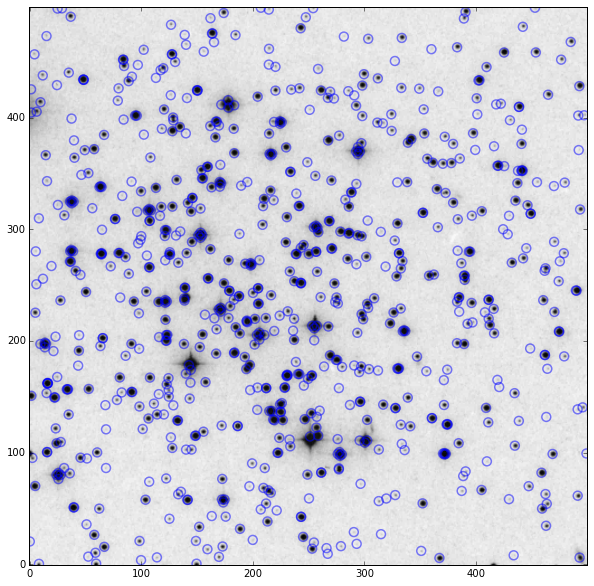

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

plt.rc('figure', figsize=(10, 10))
plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='blue', lw=1.5, alpha=0.5)